# get_sizes
This is a small notebook created for one purpose, to create the freeflow illustration.

In [24]:
# loading libraries
from sklearn.datasets import load_files
import os
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
# loading data
data = load_files('/seedlings-data/train', load_content=False, shuffle=False)

print(f"There are {len(data['target_names'])} categories")
print (f"These categories are {data['target_names']}")
print (f"There are {len(data['filenames'])} images in training dataset")

There are 12 categories
These categories are ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
There are 4750 images in training dataset


In [26]:
category_dict = {}
for category in data['target_names']:
    print(category)
    result = list(Path(f"/seedlings-data/train/{category}/").glob('*.png'))
    size_list = []
    for filename in result:
        with Image.open(filename) as image:
            width, height = image.size
            area = width * height
            size_list.append(area)
    category_dict[category] = int(np.average(size_list)) #np.array(size_list)
    print(int(np.average(size_list)))

Black-grass
699271
Charlock
269187
Cleavers
119280
Common Chickweed
79054
Common wheat
285278
Fat Hen
136219
Loose Silky-bent
330415
Maize
406688
Scentless Mayweed
95845
Shepherds Purse
144580
Small-flowered Cranesbill
154824
Sugar beet
461975


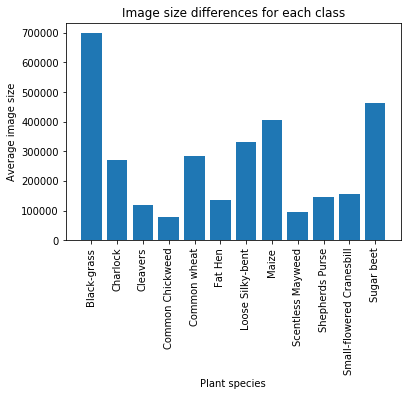

In [29]:
plt.bar(range(len(category_dict)), list(category_dict.values()), align='center')
plt.xticks(range(len(category_dict)), list(category_dict.keys()), rotation='vertical')
plt.xlabel("Plant species")
plt.ylabel("Average image size")
plt.title('Image size differences for each class')
plt.show()